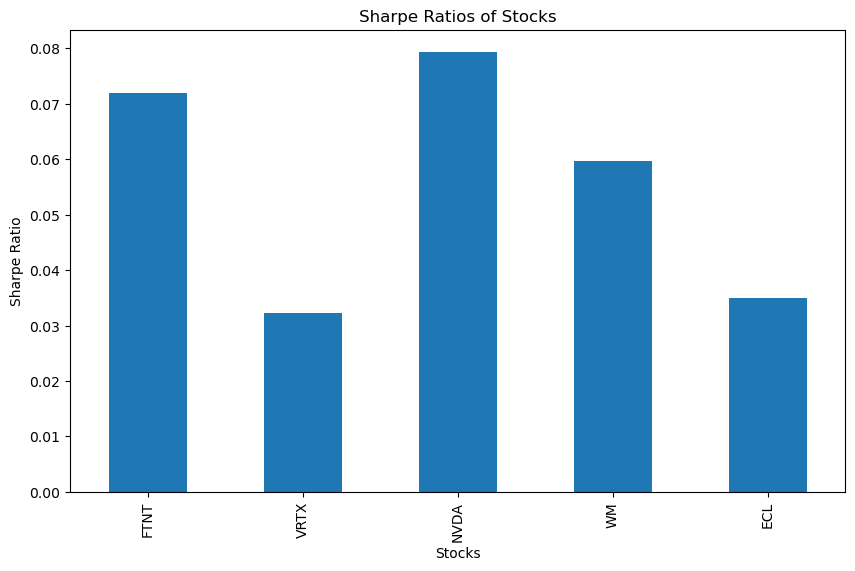

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Read and prepare the data
ftnt = pd.read_csv('FTNT.csv', index_col='Date')
vrtx = pd.read_csv('VRTX.csv', index_col='Date')
nvda = pd.read_csv('NVDA.csv', index_col='Date')
wm = pd.read_csv('WM.csv', index_col='Date')
ecl = pd.read_csv('ECL.csv', index_col='Date')

# Convert index to datetime
ftnt.index = pd.to_datetime(ftnt.index)
vrtx.index = pd.to_datetime(vrtx.index)
nvda.index = pd.to_datetime(nvda.index)
wm.index = pd.to_datetime(wm.index)
ecl.index = pd.to_datetime(ecl.index)

# Combine and clean data
combined_df = pd.concat([ftnt['Close'], vrtx['Close'], nvda['Close'], wm['Close'], ecl['Close']], axis=1)
combined_df.columns = ['FTNT', 'VRTX', 'NVDA', 'WM', 'ECL']
combined_df.ffill(inplace=True)  # Forward fill to handle NaNs

# Calculate daily returns
daily_returns = combined_df.pct_change().dropna()

# Remove outliers in daily returns
z_scores = stats.zscore(daily_returns)
filtered_entries = (np.abs(z_scores) < 3).all(axis=1)
daily_returns = daily_returns[filtered_entries]

# Convert a 4% annual risk-free rate to a daily rate
annual_risk_free_rate = 0.04  # 4% as a decimal
daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1/365) - 1

# Calculate Sharpe Ratios for each stock
sharpe_ratios = (daily_returns.mean() - daily_risk_free_rate) / daily_returns.std()

# Plot Sharpe Ratios
plt.figure(figsize=(10, 6))
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios of Stocks')
plt.ylabel('Sharpe Ratio')
plt.xlabel('Stocks')
plt.show()
